In [1]:
import pandas as pd

data = pd.read_csv('data/house-prices.csv')
data = data.drop('HomeID', axis=1)
data

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,114300,1790,2,2,2,No,East
1,114200,2030,4,2,3,No,East
2,114800,1740,3,2,1,No,East
3,94700,1980,3,2,3,No,East
4,119800,2130,3,3,3,No,East
...,...,...,...,...,...,...,...
123,119700,1900,3,3,3,Yes,East
124,147900,2160,4,3,3,Yes,East
125,113500,2070,2,2,2,No,North
126,149900,2020,3,3,1,No,West


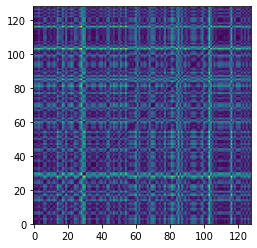

In [2]:
from scripts.DistanceHelper import get_distance, DistanceType
import numpy as np
import matplotlib.pyplot as plt

number_of_rows = data.shape[0]
number_of_columns = data.shape[1]
euclidean_distance_matrix = np.zeros((number_of_rows, number_of_rows))

for i, element_0 in data.iterrows():
    for j, element_1 in data.iterrows():
        euclidean_distance_matrix[i, j] = get_distance(
            element_0, element_1, number_of_columns, DistanceType.EUCLIDEAN
        )
        
plt.imshow(euclidean_distance_matrix)
plt.ylim(0, 128)
plt.show()

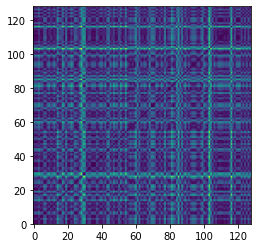

In [3]:
from scripts.DistanceHelper import get_distance, DistanceType
import numpy as np
import matplotlib.pyplot as plt

number_of_rows = data.shape[0]
number_of_columns = data.shape[1]
manhattan_distance_matrix = np.zeros((number_of_rows, number_of_rows))

for i, element_0 in data.iterrows():
    for j, element_1 in data.iterrows():
        manhattan_distance_matrix[i, j] = get_distance(
            element_0, element_1, number_of_columns, DistanceType.MANHATTAN
        )
        
plt.imshow(manhattan_distance_matrix)
plt.ylim(0, 128)
plt.show()

In [4]:
print(f'Euclidean: \n Mean: {euclidean_distance_matrix.mean()}')
print(f'Manhattan: \n Mean: {manhattan_distance_matrix.mean()}')

Euclidean: 
 Mean: 30055.349130814982
Manhattan: 
 Mean: 30291.340942382812


# Find nearest neighbours

In [23]:
new_input = [
    2050,  # Square feet
    2,  # Bedrooms
    1,  # Bathrooms
    2,  # Offers
    "No",  # Brick
    "East",  # Neighborhood
]

new_data = data.drop("Price", axis=1)
distances = []
for i, element_0 in new_data.iterrows():
    distance = get_distance(element_0, new_input, len(new_input), DistanceType.MANHATTAN)
    distances.append(distance)

price_sum = 0
for i in range(0, 5):
    min_distance_index = np.argmin(distances)
    price = data.iloc[min_distance_index]['Price']
    print(f'\n\nClosest instance #{i+1}: \n {data.iloc[min_distance_index]}')
    price_sum += price
    distances[min_distance_index] = np.max(distance)
    
average = price_sum / 5

print(f'The predicted price is {average}')



Closest data #1: 
 Price           164800
SqFt              2050
Bedrooms             2
Bathrooms            2
Offers               1
Brick              Yes
Neighborhood      West
Name: 82, dtype: object


Closest data #2: 
 Price           90300
SqFt             2050
Bedrooms            3
Bathrooms           2
Offers              6
Brick              No
Neighborhood    North
Name: 47, dtype: object


Closest data #3: 
 Price           125700
SqFt              2040
Bedrooms             3
Bathrooms            3
Offers               2
Brick               No
Neighborhood      East
Name: 73, dtype: object


Closest data #4: 
 Price           144800
SqFt              2060
Bedrooms             2
Bathrooms            2
Offers               1
Brick              Yes
Neighborhood      East
Name: 122, dtype: object


Closest data #5: 
 Price           145500
SqFt              2060
Bedrooms             3
Bathrooms            2
Offers               1
Brick               No
Neighborhood      West


114300